In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
stats = pd.read_csv("dist/results.csv")
stats["size"] = stats["rows"] * stats["columns"]
stats["columns"] = stats["columns"].astype(int)
stats["rows"] = stats["rows"].astype(int)
stats["size"] = stats["size"].astype(int)
stats["complexity"] = stats["complexity"].astype(int)
stats["pathLength"] = stats["pathLength"].astype(int)
stats["timeoutReached"] = stats["timeElapsed"] >= stats["timeout"]
stats_solved = stats[stats["solved"] == True]
stats

,method,solved,pathLength,timeout,timeElapsed,rows,columns,complexity,seed,size,timeoutReached
0,A*,True,14,8.0,0.120,4,5,20,1,20,False
1,Greedy,True,14,8.0,0.113,4,5,20,1,20,False
2,MCTS,True,27,8.0,3.509,4,5,20,1,20,False
3,A*,True,10,8.0,0.053,4,5,20,2,20,False
4,Greedy,True,11,8.0,0.003,4,5,20,2,20,False
...,...,...,...,...,...,...,...,...,...,...,...
535,Greedy,False,35,82.5,82.500,4,13,35,7,52,True
536,MCTS,False,30,82.5,42.537,4,13,35,7,52,False
537,A*,True,23,82.5,0.783,4,13,35,8,52,False
538,Greedy,True,23,82.5,0.021,4,13,35,8,52,False


In [12]:
stats_numbers = stats_solved.select_dtypes(include=["number"])
stats_numbers = stats_numbers.drop(["rows", "columns", "seed"], axis=1)
stats_numbers["method"] = stats["method"]
stats_numbers["size"] = stats["size"]
stats_numbers = stats_numbers.drop("complexity", axis=1)
size_complexity_mean = stats_numbers.groupby(["size", "method"]).agg(["mean", "std"])
size_complexity_mean = stats_numbers.groupby(["size", "method"]).agg("mean")
size_complexity_mean

pathLength    timeout  timeElapsed
size method                                    
20   A*       14.588235  13.147059     0.831176
     Greedy   20.250000  13.250000     0.074400
     MCTS     27.350000  13.250000     3.268100
24   A*       17.428571  20.250000     4.300071
     Greedy   22.000000  21.031250     0.062688
     MCTS     30.352941  21.558824     5.886118
28   A*       18.090909  27.818182     0.712455
     Greedy   29.562500  29.031250     0.324750
     MCTS     36.307692  28.846154     8.389154
32   A*       20.833333  36.666667     4.244417
     Greedy   23.250000  36.083333     0.434500
     MCTS     35.642857  37.500000    12.211143
36   A*       17.500000  42.625000     0.855125
     Greedy   29.142857  45.000000     0.542071
     MCTS     31.400000  43.500000    12.215000
40   A*       22.222222  52.277778     2.875444
     Greedy   30.071429  52.250000     0.313857
     MCTS     45.700000  52.200000    21.865100
44   A*       20.545455  59.500000     1.524455
     Greedy   26.312500  60.812500     1.059500
     MCTS     38.933333  61.133333    22.687067
48   A*       20.888889  67.500000     7.438111
     Greedy   27.750000  68.083333     0.110417
     MCTS     36.300000  68.200000    86.444700
52   A*       19.777778  75.888889     3.487000
     Greedy   28.416667  76.666667     1.981500
     MCTS     35.750000  76.375000    27.465375

In [13]:
timeout_rate = stats.groupby(["size", "method"]).agg("mean")["timeoutReached"]
timeout_rate

size  method
20    A*        0.15
      Greedy    0.00
      MCTS      0.00
24    A*        0.30
      Greedy    0.20
      MCTS      0.05
28    A*        0.40
      Greedy    0.15
      MCTS      0.05
32    A*        0.40
      Greedy    0.40
      MCTS      0.00
36    A*        0.40
      Greedy    0.10
      MCTS      0.10
40    A*        0.45
      Greedy    0.20
      MCTS      0.10
44    A*        0.40
      Greedy    0.15
      MCTS      0.00
48    A*        0.50
      Greedy    0.35
      MCTS      0.30
52    A*        0.45
      Greedy    0.30
      MCTS      0.20
Name: timeoutReached, dtype: float64

In [14]:
success_rates = stats[stats["solved"]].groupby(["size", "method"]).size() / stats.groupby(["size", "method"]).size()
success_rates

size  method
20    A*        0.85
      Greedy    1.00
      MCTS      1.00
24    A*        0.70
      Greedy    0.80
      MCTS      0.85
28    A*        0.55
      Greedy    0.80
      MCTS      0.65
32    A*        0.60
      Greedy    0.60
      MCTS      0.70
36    A*        0.40
      Greedy    0.70
      MCTS      0.50
40    A*        0.45
      Greedy    0.70
      MCTS      0.50
44    A*        0.55
      Greedy    0.80
      MCTS      0.75
48    A*        0.45
      Greedy    0.60
      MCTS      0.50
52    A*        0.45
      Greedy    0.60
      MCTS      0.40
dtype: float64

In [15]:
size_complexity_mean["successRate"] = success_rates
size_complexity_mean["timeoutRate"] = timeout_rate
size_complexity_mean

pathLength    timeout  timeElapsed  successRate  timeoutRate
size method                                                              
20   A*       14.588235  13.147059     0.831176         0.85         0.15
     Greedy   20.250000  13.250000     0.074400         1.00         0.00
     MCTS     27.350000  13.250000     3.268100         1.00         0.00
24   A*       17.428571  20.250000     4.300071         0.70         0.30
     Greedy   22.000000  21.031250     0.062688         0.80         0.20
     MCTS     30.352941  21.558824     5.886118         0.85         0.05
28   A*       18.090909  27.818182     0.712455         0.55         0.40
     Greedy   29.562500  29.031250     0.324750         0.80         0.15
     MCTS     36.307692  28.846154     8.389154         0.65         0.05
32   A*       20.833333  36.666667     4.244417         0.60         0.40
     Greedy   23.250000  36.083333     0.434500         0.60         0.40
     MCTS     35.642857  37.500000    12.211143         0.70         0.00
36   A*       17.500000  42.625000     0.855125         0.40         0.40
     Greedy   29.142857  45.000000     0.542071         0.70         0.10
     MCTS     31.400000  43.500000    12.215000         0.50         0.10
40   A*       22.222222  52.277778     2.875444         0.45         0.45
     Greedy   30.071429  52.250000     0.313857         0.70         0.20
     MCTS     45.700000  52.200000    21.865100         0.50         0.10
44   A*       20.545455  59.500000     1.524455         0.55         0.40
     Greedy   26.312500  60.812500     1.059500         0.80         0.15
     MCTS     38.933333  61.133333    22.687067         0.75         0.00
48   A*       20.888889  67.500000     7.438111         0.45         0.50
     Greedy   27.750000  68.083333     0.110417         0.60         0.35
     MCTS     36.300000  68.200000    86.444700         0.50         0.30
52   A*       19.777778  75.888889     3.487000         0.45         0.45
     Greedy   28.416667  76.666667     1.981500         0.60         0.30
     MCTS     35.750000  76.375000    27.465375         0.40         0.20

In [16]:
rename = {
    "mean": "Mean",
    "std": "STD",
    "successRate": "Success rate",
    "size": "Size",
    "complexity": "Complexity",
    "method": "Method",
    "timeout": "Timeout (s)",
    "pathLength": "Path length",
    "timeElapsed": "Time elapsed (s)",
    "method": "Method",
    "Complexity": "Complexity",
    "size": "Size",
    "solved": "Success rate",
    "timeoutRate": "Timeout rate",
}

size_complexity_mean = size_complexity_mean.rename(columns=rename)

# Rename the index
size_complexity_mean.index.names = ["Size", "Method"]
size_complexity_mean = size_complexity_mean.drop("Timeout (s)", axis=1)
display(size_complexity_mean)
size_complexity_mean.to_latex("report/sections/results_table_1.tex", float_format="%.2f")
size_complexity_mean = size_complexity_mean.unstack("Method")
size_complexity_mean

Path length  Time elapsed (s)  Success rate  Timeout rate
Size Method                                                           
20   A*        14.588235          0.831176          0.85          0.15
     Greedy    20.250000          0.074400          1.00          0.00
     MCTS      27.350000          3.268100          1.00          0.00
24   A*        17.428571          4.300071          0.70          0.30
     Greedy    22.000000          0.062688          0.80          0.20
     MCTS      30.352941          5.886118          0.85          0.05
28   A*        18.090909          0.712455          0.55          0.40
     Greedy    29.562500          0.324750          0.80          0.15
     MCTS      36.307692          8.389154          0.65          0.05
32   A*        20.833333          4.244417          0.60          0.40
     Greedy    23.250000          0.434500          0.60          0.40
     MCTS      35.642857         12.211143          0.70          0.00
36   A*        17.500000          0.855125          0.40          0.40
     Greedy    29.142857          0.542071          0.70          0.10
     MCTS      31.400000         12.215000          0.50          0.10
40   A*        22.222222          2.875444          0.45          0.45
     Greedy    30.071429          0.313857          0.70          0.20
     MCTS      45.700000         21.865100          0.50          0.10
44   A*        20.545455          1.524455          0.55          0.40
     Greedy    26.312500          1.059500          0.80          0.15
     MCTS      38.933333         22.687067          0.75          0.00
48   A*        20.888889          7.438111          0.45          0.50
     Greedy    27.750000          0.110417          0.60          0.35
     MCTS      36.300000         86.444700          0.50          0.30
52   A*        19.777778          3.487000          0.45          0.45
     Greedy    28.416667          1.981500          0.60          0.30
     MCTS      35.750000         27.465375          0.40          0.20

Path length                       Time elapsed (s)            \
Method          A*     Greedy       MCTS               A*    Greedy   
Size                                                                  
20       14.588235  20.250000  27.350000         0.831176  0.074400   
24       17.428571  22.000000  30.352941         4.300071  0.062688   
28       18.090909  29.562500  36.307692         0.712455  0.324750   
32       20.833333  23.250000  35.642857         4.244417  0.434500   
36       17.500000  29.142857  31.400000         0.855125  0.542071   
40       22.222222  30.071429  45.700000         2.875444  0.313857   
44       20.545455  26.312500  38.933333         1.524455  1.059500   
48       20.888889  27.750000  36.300000         7.438111  0.110417   
52       19.777778  28.416667  35.750000         3.487000  1.981500   

                  Success rate              Timeout rate               
Method       MCTS           A* Greedy  MCTS           A* Greedy  MCTS  
Size                                                                   
20       3.268100         0.85    1.0  1.00         0.15   0.00  0.00  
24       5.886118         0.70    0.8  0.85         0.30   0.20  0.05  
28       8.389154         0.55    0.8  0.65         0.40   0.15  0.05  
32      12.211143         0.60    0.6  0.70         0.40   0.40  0.00  
36      12.215000         0.40    0.7  0.50         0.40   0.10  0.10  
40      21.865100         0.45    0.7  0.50         0.45   0.20  0.10  
44      22.687067         0.55    0.8  0.75         0.40   0.15  0.00  
48      86.444700         0.45    0.6  0.50         0.50   0.35  0.30  
52      27.465375         0.45    0.6  0.40         0.45   0.30  0.20

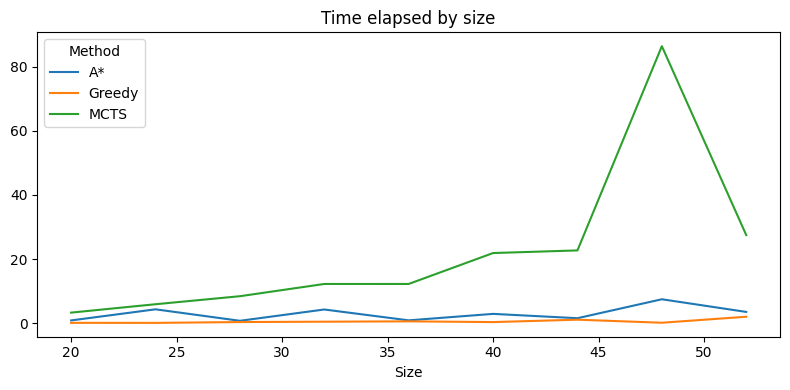

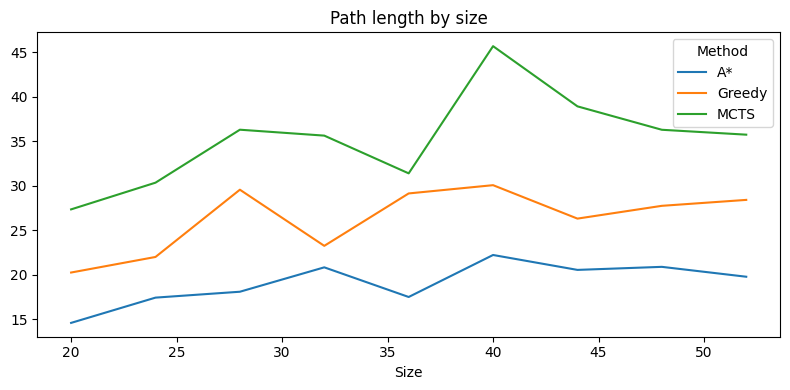

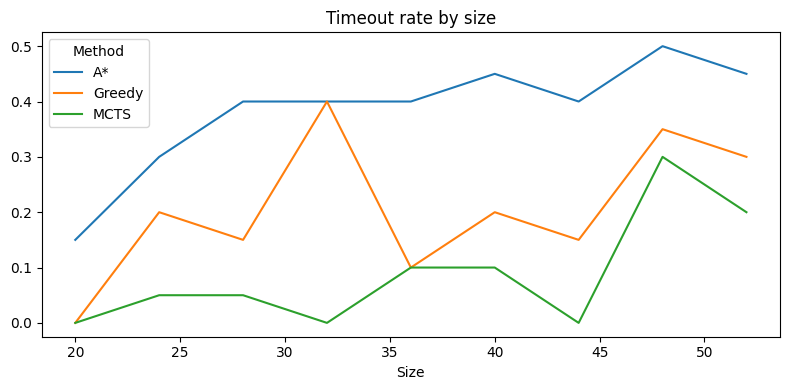

In [17]:
stats_solved = stats[stats["solved"]]
stats_solved = stats_solved[["timeElapsed", "pathLength", "size", "method", "solved"]]
stats_solved = stats_solved.groupby(["size", "method"]).agg("mean")
stats_solved = stats_solved.drop("solved", axis=1)
stats_solved = stats_solved.unstack("method")
stats_solved = stats_solved.rename(columns=rename)
stats_solved.index.names = ["Size"]

size_complexity_mean.plot(
    title="Time elapsed by size",
    y="Time elapsed (s)",
    figsize=(8, 4),
)
plt.tight_layout()
plt.savefig("report/images/time_elapsed_by_size.png")

size_complexity_mean.plot(
    title="Path length by size",
    y="Path length",
    figsize=(8, 4),
)
plt.tight_layout()
plt.savefig("report/images/path_length_by_size.png")

size_complexity_mean.plot(
    title="Timeout rate by size",
    y="Timeout rate",
    figsize=(8, 4),
)
plt.tight_layout()
plt.savefig("report/images/timeout_rate_by_size.png")

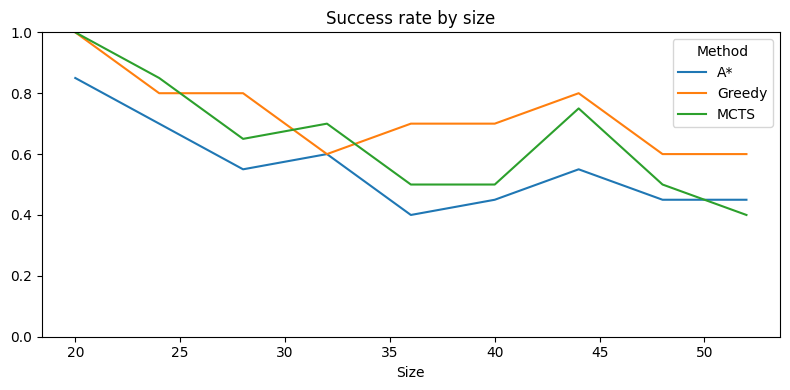

In [18]:
size_complexity_mean.plot(
    y="Success rate",
    title="Success rate by size",
    ylim=(0, 1),
    figsize=(8, 4),
)
plt.tight_layout()
plt.savefig("report/images/success_rate_by_size.png")

<Axes: title={'center': 'Timeout rate by size'}, xlabel='size'>

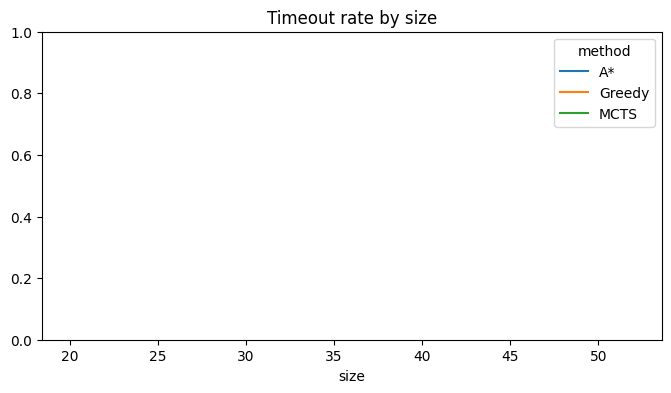

In [19]:
timeout_rate = stats.groupby(["size", "method"]).agg("mean")[["timeout"]].unstack("method")

timeout_rate.plot(
    y="timeout",
    title="Timeout rate by size",
    ylim=(0, 1),
    figsize=(8, 4),
)

In [20]:
stats["Timeout reached"] = stats["timeout"] <= stats["timeElapsed"]
stats

,method,solved,pathLength,timeout,timeElapsed,rows,columns,complexity,seed,size,timeoutReached,Timeout reached
0,A*,True,14,8.0,0.120,4,5,20,1,20,False,False
1,Greedy,True,14,8.0,0.113,4,5,20,1,20,False,False
2,MCTS,True,27,8.0,3.509,4,5,20,1,20,False,False
3,A*,True,10,8.0,0.053,4,5,20,2,20,False,False
4,Greedy,True,11,8.0,0.003,4,5,20,2,20,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
535,Greedy,False,35,82.5,82.500,4,13,35,7,52,True,True
536,MCTS,False,30,82.5,42.537,4,13,35,7,52,False,False
537,A*,True,23,82.5,0.783,4,13,35,8,52,False,False
538,Greedy,True,23,82.5,0.021,4,13,35,8,52,False,False


<Figure size 3000x3000 with 0 Axes>

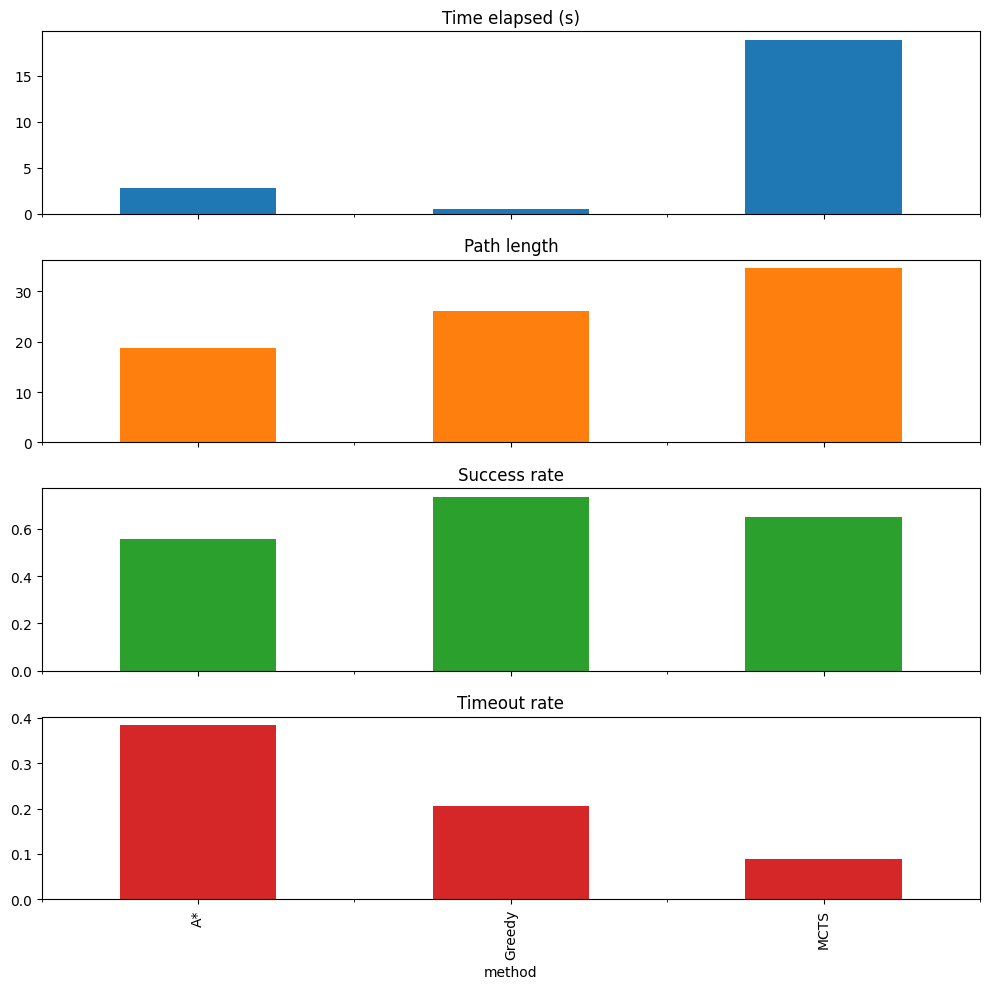

In [21]:
success_rate = stats.groupby("method").agg("mean").rename(columns=rename)["Success rate"]
timeout_rate = stats.groupby("method").agg("mean").rename(columns=rename)["Timeout reached"]
avg_stats = stats[stats["solved"]].groupby("method").agg("mean").rename(columns=rename)[["Time elapsed (s)", "Path length"]]
avg_stats["Success rate"] = success_rate
avg_stats["Timeout rate"] = timeout_rate
avg_stats

avg_stats.to_latex("report/sections/results_table_2.tex", float_format="%.2f")

plt.figure(figsize=(10, 10), dpi=300)
avg_stats.plot(
    kind="bar",
    subplots=True,
    layout=(4, 1),
    figsize=(10, 10),
    legend=False,
    ylim=(0, None)
)
plt.tight_layout()
plt.savefig("report/images/overall_performances.png")